In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import waveoptics

from mmfsim.grid import Grid
from mmfsim.fiber import StepIndexFiber
from mmfsim.speckle import StepIndexSpeckle

In [23]:
from scipy.interpolate import interp2d

def interpolate(image, scale, kind = 'linear'):
    height, width= image.shape

    # Create a grid of coordinates for the original image
    x = np.arange(0, width)
    y = np.arange(0, height)

    # Create interpolation functions for each channel
    interpolators = interp2d(x, y, image, kind=kind, bounds_error=False, fill_value=0)

    # Calculate the new dimensions
    new_height = int(height * scale)
    new_width = int(width * scale)

    # Generate a new grid of coordinates for the interpolated image
    new_x = np.linspace(0, width - 1, new_width)
    new_y = np.linspace(0, height - 1, new_height)

    return interpolators(new_x, new_y)

def plot_reim(field):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(np.real(field), cmap='bwr', vmin=-np.max(np.abs(np.real(field))), vmax=+np.max(np.abs(np.real(field))))
    axs[1].imshow(np.imag(field), cmap='bwr', vmin=-np.max(np.abs(np.imag(field))), vmax=+np.max(np.abs(np.imag(field))))

def plot_reim_compare(field, field2, figsize=(15,10)):
    fig, axs = plt.subplots(2, 3, figsize=figsize)
    re1 = axs[0, 0].imshow(np.real(field), cmap='bwr', vmin=-np.max(np.abs(np.real(field))), vmax=+np.max(np.abs(np.real(field))))
    im1 = axs[1, 0].imshow(np.imag(field), cmap='bwr', vmin=-np.max(np.abs(np.imag(field))), vmax=+np.max(np.abs(np.imag(field))))
    plt.colorbar(re1, ax=axs[0,0])
    plt.colorbar(im1, ax=axs[1,0])

    re2 = axs[0, 1].imshow(np.real(field2), cmap='bwr', vmin=-np.max(np.abs(np.real(field2))), vmax=+np.max(np.abs(np.real(field2))))
    im2 = axs[1, 1].imshow(np.imag(field2), cmap='bwr', vmin=-np.max(np.abs(np.imag(field2))), vmax=+np.max(np.abs(np.imag(field2))))
    plt.colorbar(re2, ax=axs[0,1])
    plt.colorbar(im2, ax=axs[1,1])

    plre = axs[0, 2].imshow(np.real(field2) - np.real(field), cmap='bwr')
    plim = axs[1, 2].imshow(np.imag(field2) - np.imag(field), cmap='bwr')
    plt.colorbar(plre, ax=axs[0,2])
    plt.colorbar(plim, ax=axs[1,2])

In [2]:
grid = Grid(pixel_size=1e-6)
fiber = StepIndexFiber(radius=50e-6)
print(fiber)

c:\users\jysru\coding\mmf_lp_modes\mmfsim\fiber.py:176: RuntimeWarning: invalid value encountered in divide
  return sp.jv(n, u) / (u * sp.jv(n - 1, u)) + sp.kn(n, w) / (w * sp.kn(n - 1, w))
c:\users\jysru\coding\mmf_lp_modes\mmfsim\fiber.py:175: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(v**2 - u**2)


StepIndexFiber instance with:
  - Radius: 50.0 um
  - Core index: 1.465
  - Cladding index: 1.445
  - Wavelength: 1064.0 nm
  - Numerical aperture: 0.241
  - Number of guided LP modes: 649
  - Number of guided LP modes (counting degenerates): 1275
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[ 1.46497798  0.          0.          1.        ]
 [ 1.4649441   2.          1.          1.        ]
 [ 1.46489958  4.          2.          1.        ]
 [ 1.46488399  1.          0.          2.        ]
 [ 1.46484502  6.          3.          1.        ]
 [ 1.46481261  3.          1.          2.        ]
 [ 1.46478076  8.          4.          1.        ]
 [ 1.46473025  5.          2.          2.        ]
 [ 1.46471488  2.          0.          3.        ]
 [ 1.46470706 10.          5.          1.        ]]


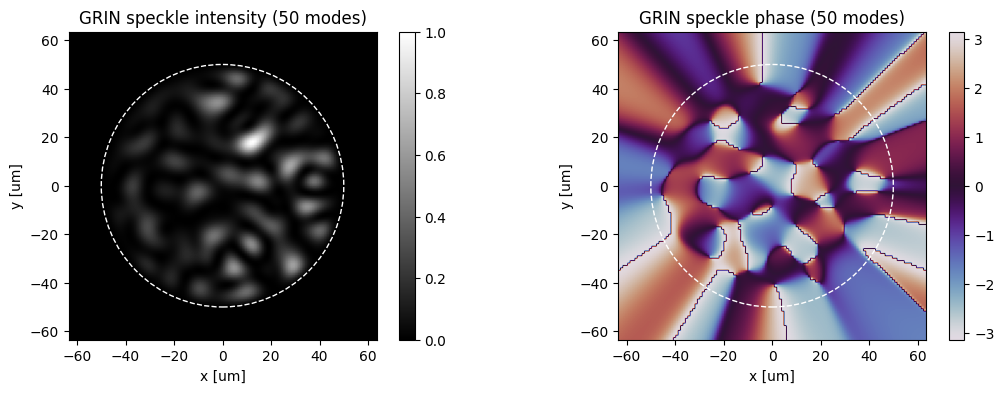

In [52]:
speckle = StepIndexSpeckle(fiber, grid, N_modes=50)
speckle.compose()
_ = speckle.plot(complex=True)

(<Figure size 1500x500 with 2 Axes>, <Axes: >)

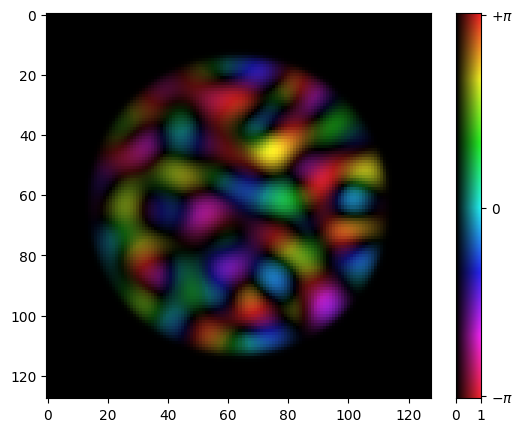

In [53]:
from waveoptics.plots.plots import complex_imshow

complex_imshow(speckle.field)

(128, 128)


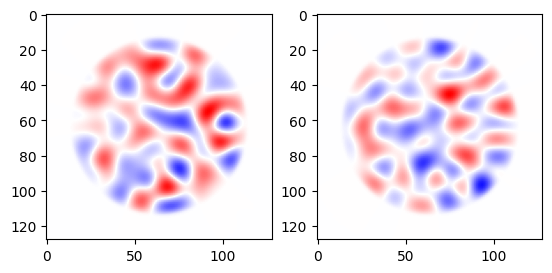

In [54]:
field = speckle.field
print(field.shape)
plot_reim(field)

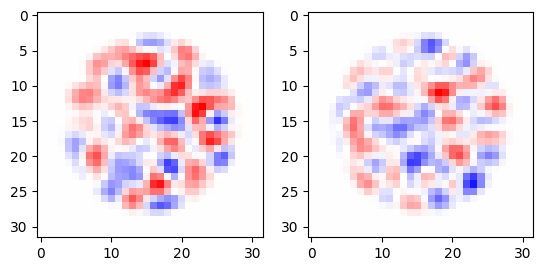

In [55]:
from waveoptics.tensors.numpy import avg_pooling_2d

sub = 4
subfield = avg_pooling_2d(np.real(field), kernel=(sub, sub)) + 1j * avg_pooling_2d(np.imag(field), kernel=(sub, sub))
plot_reim(subfield)

In [56]:
import warnings

# Ignore specific DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

0.990154104069997
0.9843612807379696


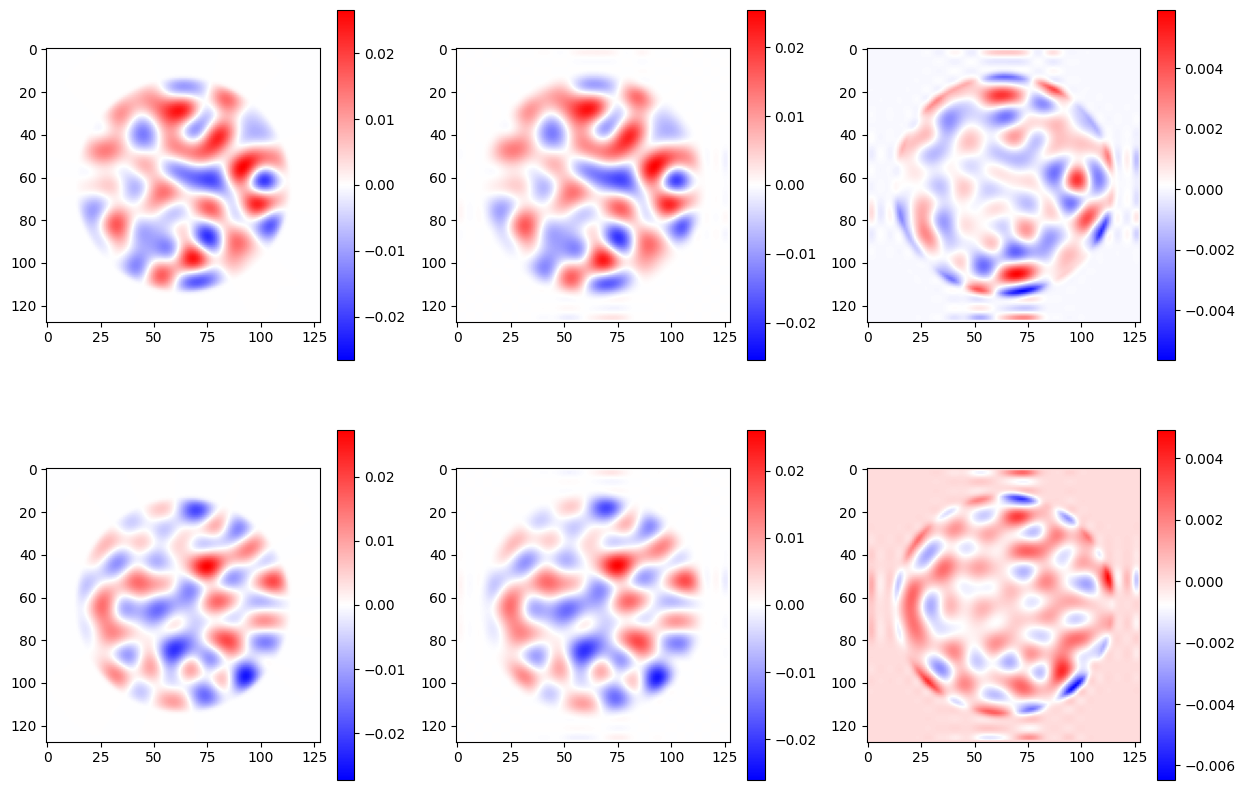

In [58]:
from waveoptics.metrics.numpy import pearson, quality

s = 4
# k = 'linear'
# k = 'cubic'
k = 'quintic'
field2 = interpolate(np.real(subfield), scale=s, kind=k) + 1j * interpolate(np.imag(subfield), scale=s, kind=k)

print(quality(field, field2))
print(pearson(field, field2))

plot_reim_compare(field, field2)

(<Figure size 1500x500 with 2 Axes>, <Axes: >)

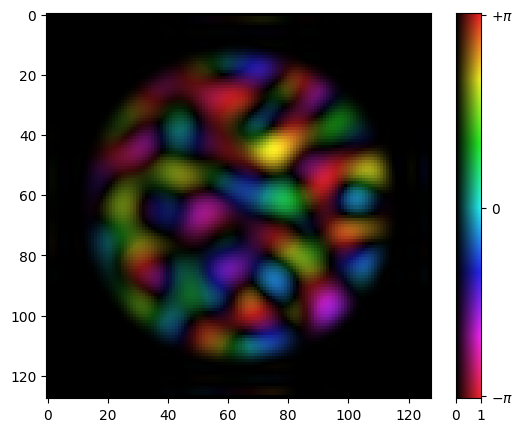

In [59]:
complex_imshow(field2)